In [1]:
import pandas as pd
df = pd.read_csv('/content/Wholesale customers data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [2]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df = df.drop (['Delicassen'], axis=1)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,2,3,12669,9656,7561,214,2674
1,2,3,7057,9810,9568,1762,3293
2,2,3,6353,8808,7684,2405,3516
3,1,3,13265,1196,4221,6404,507
4,2,3,22615,5410,7198,3915,1777


In [8]:
df = df.drop (['Detergents_Paper','Frozen'], axis=1)
df.head()

,Channel,Region,Fresh,Milk,Grocery
0,2,3,12669,9656,7561
1,2,3,7057,9810,9568
2,2,3,6353,8808,7684
3,1,3,13265,1196,4221
4,2,3,22615,5410,7198


In [10]:
df = df.rename(columns={'Channel': 'channel', 'Region' : 'region',
                       'Fresh' : 'fresh',
                       'Milk': 'milk', 'Grocery': 'grocery'})
df.head()

,channel,region,fresh,milk,grocery
0,2,3,12669,9656,7561
1,2,3,7057,9810,9568
2,2,3,6353,8808,7684
3,1,3,13265,1196,4221
4,2,3,22615,5410,7198


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

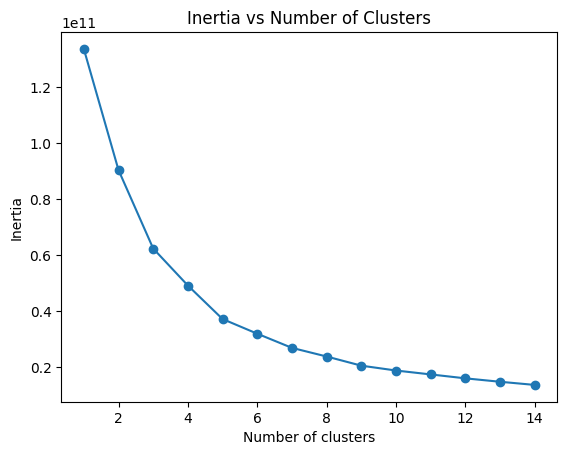

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Misalkan df adalah data frame Anda, pastikan hanya terdapat nilai numerik di dalamnya

# Drop kolom non-numerik jika ada
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Menghitung nilai inersia untuk jumlah cluster
inertias = []
for i in range(1, 15):
    km = KMeans(n_clusters=i)
    km.fit(df_numerical)
    inertias.append(km.inertia_)

# Plot nilai inersia
plt.plot(range(1, 15), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


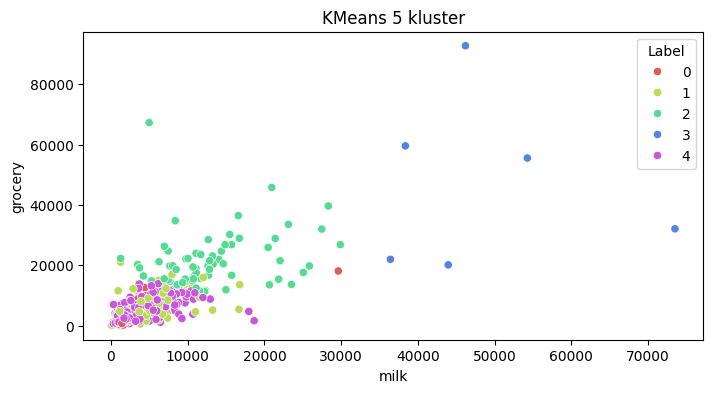

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

# Misalkan df adalah data frame Anda, pastikan hanya terdapat nilai numerik di dalamnya

# Drop kolom non-numerik jika ada
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Memilih jumlah klaster terbaik
best_k = 5
km = KMeans(n_clusters=best_k)
km.fit(df_numerical)

# Tambahkan kolom label ke dataframe df
df['Label'] = km.labels_

# Buat plot kmeans dengan klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['milk'], y=df['grocery'], hue=df['Label'], palette=sns.color_palette('hls', best_k))
plt.title('KMeans 5 kluster')
plt.xlabel('milk')
plt.ylabel('grocery')
plt.show()